File used for this simulation: france_clusters_80_snapshots_8760_period_one_week.nc -> find in resources/test_files<br/>
Number of snapshots: 168 <br> 
First snapshot: 2013-01-01 00:00:00 <br>
Last snapshot: 2013-01-08 00:00:00 <br>
Number of clusters: 80 <br>
Config file used: config.regional.yml -> find in resources/test_files/config_files_pypsa_eur (changed in order to achieve 80 clusters and weekly optimization with hourly values
)

In [1]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Notebook don't know path of the project (tests/local_benchmark -> 2 levels up = project root)
project_root = Path().resolve().parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from tests.utils import analyze_benchmark_study, get_results_path

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 10

/usr/lib/python3/dist-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.

/usr/lib/python3/dist-packages/paramiko/transport.py:261: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.



In [2]:
# France-only benchmark results (run: pytest tests/local_benchmark/benchmark.py -k "france_only" -v)
results_file = project_root / "tmp" / "benchmark_results" / "all_studies_results.csv"
print(f"📁 Results file path: {results_file}")
print(f"📁 File exists: {results_file.exists()}")

if results_file.exists():
    df = pd.read_csv(results_file)
    print(f"\n📊 Total studies in CSV: {len(df)}")
    print("\nAvailable studies:")
    for idx in range(len(df)):
        study_name = df.iloc[idx]["pypsa_network_name"]
        print(f"  Row {idx}: {study_name}")
else:
    print(f"\n❌ Results file not found. Run: pytest tests/local_benchmark/benchmark.py -k \"france_only\" -v")

📁 Results file path: /home/rtei-beg-see-dp/Gems-Development/converter_test/PyPSA-to-GEMS-Converter/tmp/benchmark_results/all_studies_results.csv
📁 File exists: True

📊 Total studies in CSV: 4

Available studies:
  Row 0: nan
  Row 1: Unnamed Network
  Row 2: Unnamed Network
  Row 3: Unnamed Network


/home/rtei-beg-see-dp/Gems-Development/converter_test/PyPSA-to-GEMS-Converter/tests/utils.py:163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



BENCHMARK ANALYSIS - STUDY ROW 3

📊 NETWORK INFORMATION:
  Network Name: Unnamed Network
  Number of Time Steps: 168
  PyPSA Version: 1.0.0
  Antares Version: v9.3.5

🔧 NETWORK COMPONENTS:
  Buses: 240
  Generators: 347
  Loads: 80
  Links: 320
  Storage Units: 24
  Stores: 160
  Lines: 153
  Transformers: 0
  Shunt Impedances: 0

⏱️  TIMING INFORMATION:
  Parsing Time: 0.4790 s
  Preprocessing Time (PyPSA): 1.0253 s
  PyPSA to GEMS Conversion Time: 5.6382 s
  Build Optimization Problem Time (PyPSA): 0.8938 s
  PyPSA Optimization Time: 2338.3726 s
  PyPSA Total Time: 2339.2664 s
  Modeler Total Time: 916.9306 s

📈 OPTIMIZATION PROBLEM SIZE:
  PyPSA Constraints: 425781
  Modeler Constraints: 413542
  Constraints Ratio (PyPSA/Modeler): 1.0296
  PyPSA Variables: 207767
  Modeler Variables: 208652
  Variables Ratio (PyPSA/Modeler): 0.9958

🎯 OBJECTIVE VALUES:
  PyPSA Objective: 175465809.017895
  Modeler Objective: 175465809.017897
  Difference: -0.000002 (-0.0000%)

⚙️  SOLVER INFORMATION

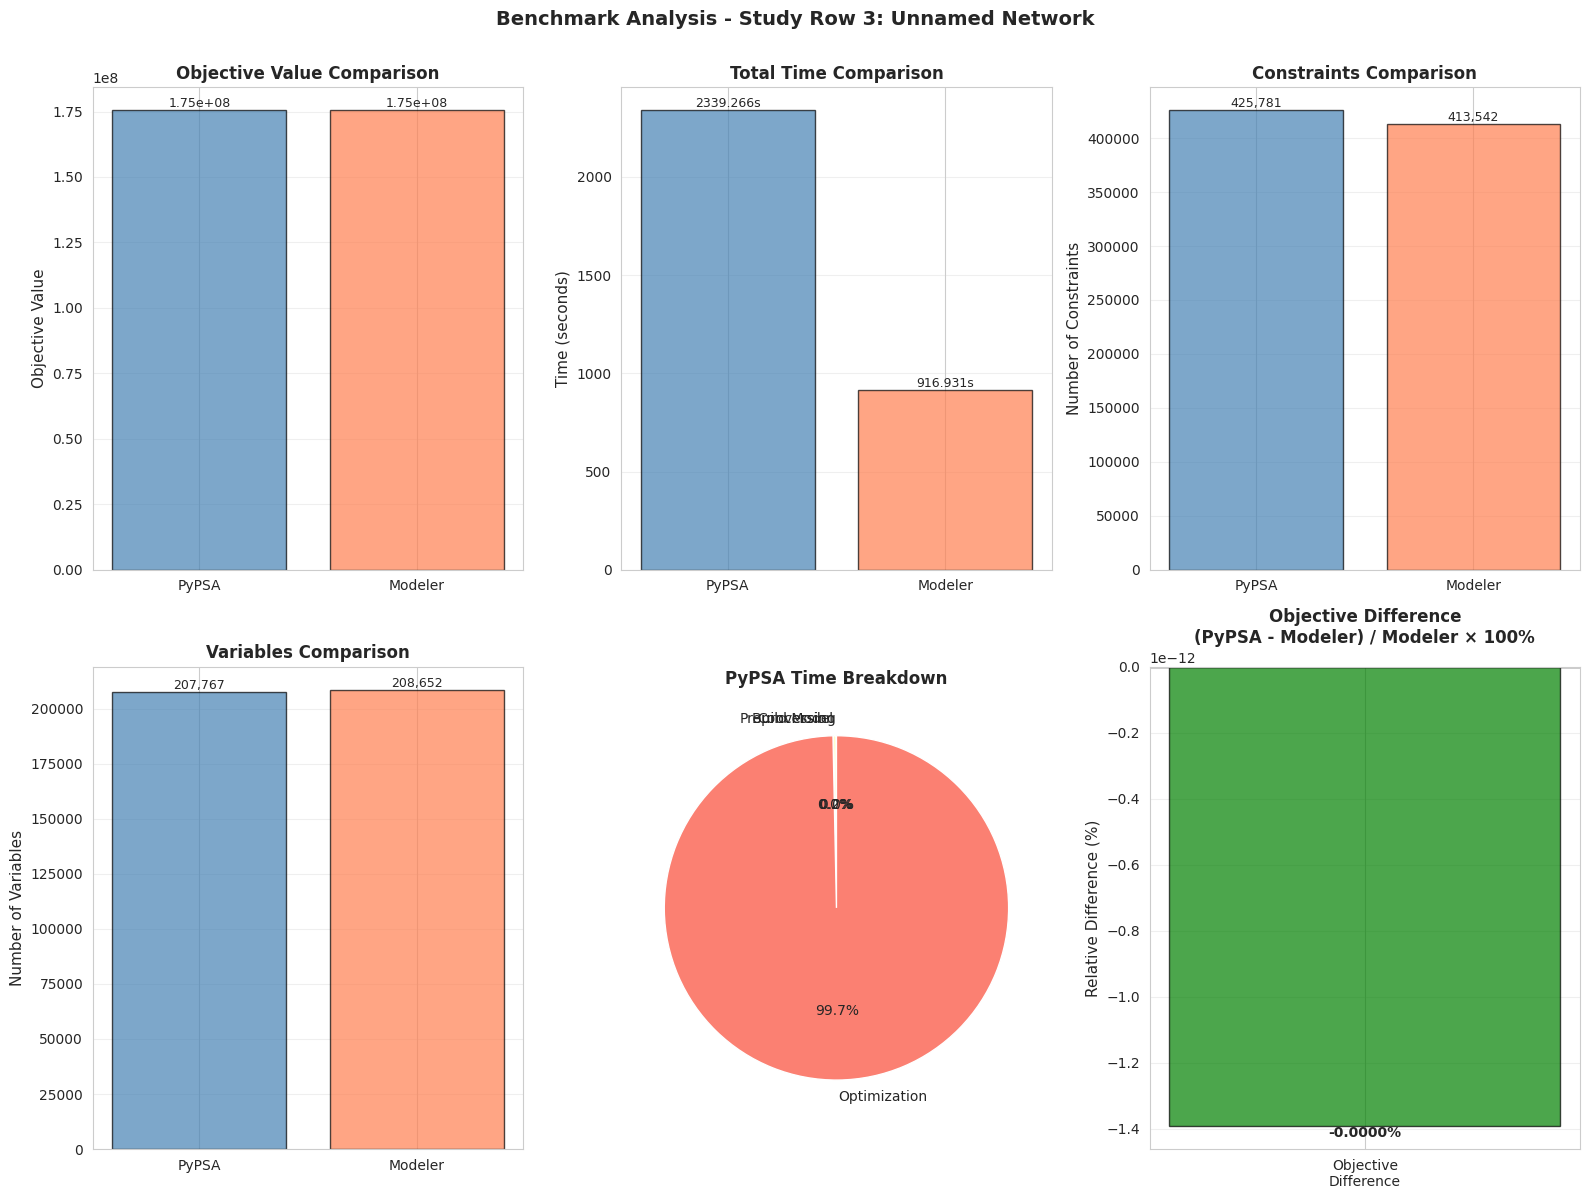

In [3]:
# Analyze France study (same statistics and plots as main benchmark notebook)
if results_file.exists():
    analyze_benchmark_study(row_number=3, results_file=results_file)
else:
    print("Run the benchmark first: pytest tests/local_benchmark/benchmark.py -k \"france_only\" -v")